# PROGRAMMING TEST: LEARNING ACTIVATIONS IN NEURAL NETWORKS   
# MONK AI

## I. BACKGROUND

Selection of the best performing AF for classification task is essentially a naive (or brute-force) procedure wherein, a popularly used AF is picked and used in the network for approximating the optimal function. If this function fails, the process is repeated with a different AF, till the network learns to approximate the ideal function. It is interesting to inquire and inspect whether there exists a possibility of building a framework which uses the inherent clues and insights from data and bring about the most suitable AF. The possibilities of such an approach could not only save significant time and effort for tuning the model, but will also open up new ways for discovering essential features of not-so-popular AFs.

## II. PROBLEM STATEMENT

Given a specific activation function

            g(x) = k0 + k1x                                                                                                                                                                                                                           

and categorical cross-entropy loss, design a Neural Network on Banknote('BankNote_Authentication.csv') data where the activation function parameters k0, k1 are learned from the data you choose from one of the above-mentioned data sets. My solution was included by the learnable parameter values.
I.e. final k0, k1 values at the end of training, 
A plot depicting changes in k0, k1 at each epoch, 
Training vs test loss, train vs. 
Test accuracy and a Loss function plot.



NOTE :
* This report containing implementation details (al-gorithm, initial settings such as sampling the parameters k0, k1 from some distribution, parameter updates one pochs, final parameter values at the end of training, train vs test loss, train and test accuracy, F1-Score, plot of the loss function vs. epochs.


* And Focusing on how to classify the detection technique of counterfeit banknotes. The approach that will be implemented to solve this Binary classification problem is by using the method of Artificial Neutral Network(ANN).

Data for this analysis Is :https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

In [83]:
# Importing the Required libraries for the analysis
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Part 1 -Data Preprocessing

In [84]:
# Importing the dataset
banknote = pd.read_csv('BankNote_Authentication.csv')
banknote.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [101]:
# summarize shape
print(banknote.shape)

(1372, 5)


In [104]:
# Describing the data
banknote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [106]:
# Checking null values
banknote.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [85]:
x= banknote.drop(['class'], axis=1)
y= banknote['class']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [87]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
print(X_train)

[[ 0.89967493  1.18805208 -1.18171152 -0.09274226]
 [ 0.79132601  1.52427784 -1.12635383 -1.42833711]
 [-1.4620017  -1.74354285  2.08102182  0.74693093]
 ...
 [ 0.06702331 -0.14939588 -0.84855885  0.61151564]
 [ 0.56385644 -0.36419707  0.87965453  1.07960312]
 [-0.87204745  1.53599667  0.28820496 -1.74799811]]


# Part 2 Making a ANN classifier

In [89]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [90]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(2, kernel_initializer = 'uniform', activation='relu', input_dim = 4))

# Adding the second hidden layer
classifier.add(Dense(2, kernel_initializer= 'uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
# Fitting the ANN to fit training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_data=(X_test,y_test))

Epoch 1/100
103/103 [==============================] - 26s 71ms/step - loss: 0.6914 - accuracy: 0.5637 - val_loss: 0.6868 - val_accuracy: 0.7143
Epoch 2/100
103/103 [==============================] - 5s 51ms/step - loss: 0.6717 - accuracy: 0.8406 - val_loss: 0.6474 - val_accuracy: 0.8455
Epoch 3/100
103/103 [==============================] - 5s 50ms/step - loss: 0.6065 - accuracy: 0.8484 - val_loss: 0.5666 - val_accuracy: 0.8542
Epoch 4/100
103/103 [==============================] - 5s 46ms/step - loss: 0.5195 - accuracy: 0.8766 - val_loss: 0.4896 - val_accuracy: 0.8863
Epoch 5/100
103/103 [==============================] - 5s 50ms/step - loss: 0.4484 - accuracy: 0.9048 - val_loss: 0.4300 - val_accuracy: 0.9213
Epoch 6/100
103/103 [==============================] - 6s 54ms/step - loss: 0.3952 - accuracy: 0.9349 - val_loss: 0.3845 - val_accuracy: 0.9388
Epoch 7/100
103/103 [==============================] - 5s 49ms/step - loss: 0.3547 - accuracy: 0.9485 - val_loss: 0.3493 - val_accuracy

In [98]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Part 3 : Making the predictions and evaluting the model

In [92]:
# Predicting test set results
y_pred = classifier.predict(X_test)

In [93]:
y_pred

array([[0.99993765],
       [0.00931671],
       [0.9999981 ],
       [0.00931671],
       [0.00931671],
       [0.00931671],
       [0.00931671],
       [0.00931671],
       [0.99975866],
       [0.99975896],
       [0.00931671],
       [0.00931671],
       [0.9999962 ],
       [0.00931671],
       [0.00931671],
       [0.00931671],
       [1.        ],
       [0.99994445],
       [0.00931671],
       [0.00931671],
       [0.9980118 ],
       [0.00931671],
       [0.00931671],
       [0.99973375],
       [0.05272722],
       [0.99976134],
       [0.00931671],
       [0.9999935 ],
       [0.00931671],
       [0.00931671],
       [0.9994557 ],
       [0.0129602 ],
       [0.9881207 ],
       [0.99999964],
       [0.9999994 ],
       [0.00931671],
       [0.00931671],
       [0.9999715 ],
       [0.00931671],
       [0.9999956 ],
       [0.850394  ],
       [0.9999997 ],
       [0.00931671],
       [0.00931671],
       [0.99996495],
       [0.9968896 ],
       [0.00931671],
       [0.009

In [94]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

In [95]:
cm

array([[190,   5],
       [  0, 148]], dtype=int64)

In [96]:
print(y_test.shape)

(343,)


In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [111]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       195
           1       0.97      1.00      0.98       148

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [109]:
# accuracy: (tp + tn) / (p + n)
from sklearn.metrics import accuracy_score
print('Accuracy score :', accuracy_score(y_test, y_pred.round()))

Accuracy score : 0.9854227405247813


In [123]:
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred.round())
print('Precision: %f' % precision)

Precision: 0.967320


In [125]:
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred.round())
print('Recall: %f' % recall)

Recall: 1.000000


In [126]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred.round())
print('F1 score: %f' % f1)

F1 score: 0.983389


# Part 4 Visualizing the results

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

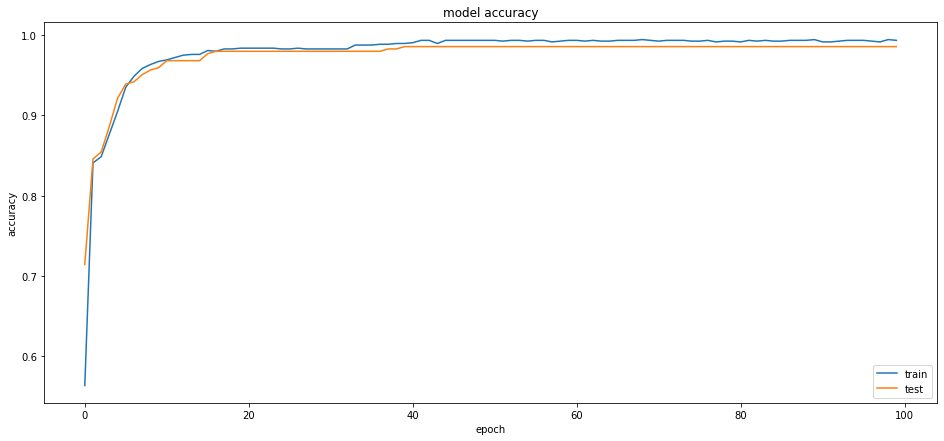

In [118]:
# summarize history for accuracy
fig = plt.subplots(figsize=(16,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch

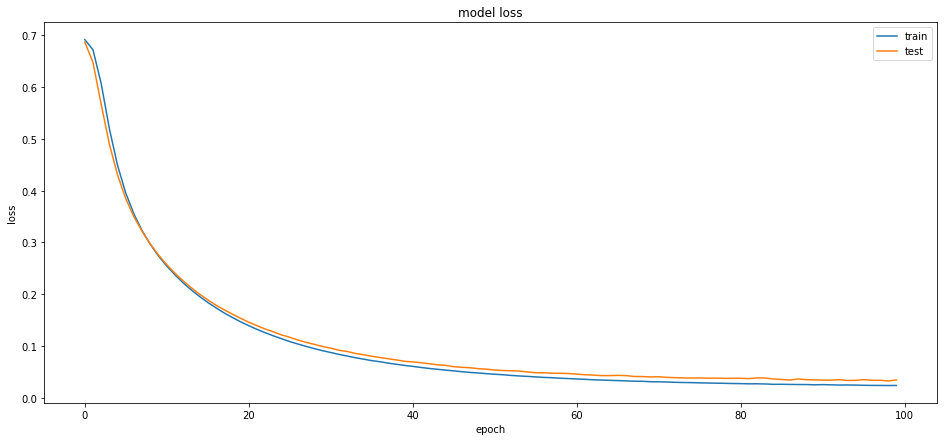

In [117]:
# summarize history for loss
fig = plt.subplots(figsize=(16,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()